In [1]:
pip install gdown

Note: you may need to restart the kernel to use updated packages.


In [73]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sys
from pyspark.sql import SparkSession
import os
import gdown
import pandas as pd
from pyspark import SparkFiles

In [74]:
spark = SparkSession.builder \
.master("local") \
.appName("Exercise1") \
.getOrCreate()

ConnectionRefusedError: [Errno 111] Connection refused

In [4]:
csvPath = 'exampleData.csv'
if not os.path.exists(csvPath):
    gdown.download(id = "1YLo060ccO-JNBJ7Cn_DT_y0LTkps-0Lg", output=csvPath, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1YLo060ccO-JNBJ7Cn_DT_y0LTkps-0Lg
To: /home/jovyan/exampleData.csv
100%|██████████| 17.4M/17.4M [00:00<00:00, 77.0MB/s]


'exampleData.csv'

In [72]:
df = spark.read.csv("exampleData.csv", header=True, inferSchema=True)

ConnectionRefusedError: [Errno 111] Connection refused

In [6]:
df.show(vertical=True)

-RECORD 0--------------------------------
 _c0                 | 14                
 dateTime            | 01-jan-1990 00:00 
 indicator_rain      | 0                 
 precipitation       | 0.3               
 indicator_temp      | 0                 
 air_temperature     | 9.1               
 indicator_wetb      | 0                 
 wetb                | 9.0               
 dewpt               | 8.9               
 vappr               | 11.4              
 relative_humidity   | 99                
 msl                 | 1006.7            
 indicator_wdsp      | 2                 
 wind_speed          | 7                 
 indicator_wddir     | 2                 
 wind_from_direction | 190               
-RECORD 1--------------------------------
 _c0                 | 15                
 dateTime            | 01-jan-1990 01:00 
 indicator_rain      | 0                 
 precipitation       | 0.2               
 indicator_temp      | 0                 
 air_temperature     | 8.2        

Reading the schema

In [7]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- dateTime: string (nullable = true)
 |-- indicator_rain: integer (nullable = true)
 |-- precipitation: string (nullable = true)
 |-- indicator_temp: integer (nullable = true)
 |-- air_temperature: string (nullable = true)
 |-- indicator_wetb: integer (nullable = true)
 |-- wetb: string (nullable = true)
 |-- dewpt: string (nullable = true)
 |-- vappr: string (nullable = true)
 |-- relative_humidity: string (nullable = true)
 |-- msl: string (nullable = true)
 |-- indicator_wdsp: integer (nullable = true)
 |-- wind_speed: string (nullable = true)
 |-- indicator_wddir: integer (nullable = true)
 |-- wind_from_direction: integer (nullable = true)



Read directly from URL

In [9]:
url = "https://cli.fusio.net/cli/climate_data/webdata/hly1075.csv"
spark.sparkContext.addFile(url)

In [16]:
df = spark.read.csv("file://"+SparkFiles.get("hly1075.csv"), header=True, inferSchema= True)
df.show()

+--------------------------+
|Station Name: ROCHES POINT|
+--------------------------+
|      Station Height: 4...|
|         Latitude:51.793  |
|      date:  -  Date an...|
|      rain:  -  Precipi...|
|      temp:  -  Air Tem...|
|      wetb:  -  Wet Bul...|
|      dewpt: -  Dew Poi...|
|      vappr: -  Vapour ...|
|      rhum:  -  Relativ...|
|      msl:   -  Mean Se...|
|      wdsp:  -  Mean Wi...|
|      wddir: -  Predomi...|
|       ind:   -  Indicator|
|                      date|
|         01-dec-1955 01:00|
|         01-dec-1955 02:00|
|         01-dec-1955 03:00|
|         01-dec-1955 04:00|
|         01-dec-1955 05:00|
|         01-dec-1955 06:00|
+--------------------------+
only showing top 20 rows



In [17]:
df.write.csv("simple.csv", header=True)

In [18]:
from pyspark.sql import functions as F

In [21]:
df = spark.read.csv("exampleData.csv", header=True, inferSchema=True)
df.select(F.col("wetb"))

DataFrame[wetb: string]

In [22]:
df.collect()[3]

Row(_c0=17, dateTime='01-jan-1990 03:00', indicator_rain=3, precipitation='0.0', indicator_temp=0, air_temperature='7.8', indicator_wetb=0, wetb='7.5', dewpt='7.1', vappr='10.1', relative_humidity='96', msl='1007.1', indicator_wdsp=2, wind_speed='1', indicator_wddir=2, wind_from_direction=190)

In [23]:
df.select("wetb").count()

245088

In [24]:
df.select("wetb").distinct()

DataFrame[wetb: string]

In [25]:
df.select("wetb").distinct().count()

264

In [27]:
df.selectExpr("wetb * 5 as newColumn", "round(air_temperature) as roundedTemper").show()

+---------+-------------+
|newColumn|roundedTemper|
+---------+-------------+
|     45.0|          9.0|
|     37.0|          8.0|
|     37.0|          8.0|
|     37.5|          8.0|
|     36.5|          8.0|
|     35.0|          8.0|
|     34.0|          7.0|
|     30.0|          7.0|
|     31.0|          7.0|
|     30.5|          7.0|
|     30.5|          8.0|
|     33.0|          8.0|
|     39.0|         10.0|
|     35.0|          9.0|
|     40.0|         10.0|
|     37.5|          9.0|
|     35.5|          9.0|
|     33.0|          8.0|
|     35.5|          9.0|
|     34.0|          8.0|
+---------+-------------+
only showing top 20 rows



In [28]:
df0 = df.selectExpr("wetb as wetbulb")

In [29]:
df0.show()

+-------+
|wetbulb|
+-------+
|    9.0|
|    7.4|
|    7.4|
|    7.5|
|    7.3|
|    7.0|
|    6.8|
|    6.0|
|    6.2|
|    6.1|
|    6.1|
|    6.6|
|    7.8|
|    7.0|
|    8.0|
|    7.5|
|    7.1|
|    6.6|
|    7.1|
|    6.8|
+-------+
only showing top 20 rows



In [30]:
df.drop("_c0")

DataFrame[dateTime: string, indicator_rain: int, precipitation: string, indicator_temp: int, air_temperature: string, indicator_wetb: int, wetb: string, dewpt: string, vappr: string, relative_humidity: string, msl: string, indicator_wdsp: int, wind_speed: string, indicator_wddir: int, wind_from_direction: int]

In [31]:
df.withColumn("air_temperature",F.round(df["air_temperature"], 1)).show()

+---+-----------------+--------------+-------------+--------------+---------------+--------------+----+-----+-----+-----------------+------+--------------+----------+---------------+-------------------+
|_c0|         dateTime|indicator_rain|precipitation|indicator_temp|air_temperature|indicator_wetb|wetb|dewpt|vappr|relative_humidity|   msl|indicator_wdsp|wind_speed|indicator_wddir|wind_from_direction|
+---+-----------------+--------------+-------------+--------------+---------------+--------------+----+-----+-----+-----------------+------+--------------+----------+---------------+-------------------+
| 14|01-jan-1990 00:00|             0|          0.3|             0|            9.1|             0| 9.0|  8.9| 11.4|               99|1006.7|             2|         7|              2|                190|
| 15|01-jan-1990 01:00|             0|          0.2|             0|            8.2|             0| 7.4|  6.4|  9.7|               89|1006.7|             2|         5|              2|      

In [32]:
df1 = df.selectExpr("cast(air_temperature as float) air_temperature")

In [33]:
df1.dtypes

[('air_temperature', 'float')]

In [35]:
df.filter((F.col('air_temperature')<5)).show()

+---+-----------------+--------------+-------------+--------------+---------------+--------------+----+-----+-----+-----------------+------+--------------+----------+---------------+-------------------+
|_c0|         dateTime|indicator_rain|precipitation|indicator_temp|air_temperature|indicator_wetb|wetb|dewpt|vappr|relative_humidity|   msl|indicator_wdsp|wind_speed|indicator_wddir|wind_from_direction|
+---+-----------------+--------------+-------------+--------------+---------------+--------------+----+-----+-----+-----------------+------+--------------+----------+---------------+-------------------+
|298|12-jan-1990 20:00|             3|          0.0|             0|            4.9|             0| 4.3|  3.4|  7.8|               90|1025.5|             2|         1|              2|                210|
|300|12-jan-1990 22:00|             3|          0.0|             0|            3.9|             0| 3.2|  2.1|  7.1|               88|1025.9|             2|         1|              2|      

In [47]:
df_u = df.select("wetb")
df_u.count()

245088

In [46]:
df_i = df.select("air_temperature")
df_i.count()

245088

In [42]:
unionDF= df_u.union(df_i)

In [48]:
unionDF.count()

490176

In [49]:
df.groupBy('precipitation').count().orderBy('count',ascending=False).show()

+-------------+------+
|precipitation| count|
+-------------+------+
|          0.0|218530|
|          0.2|  5928|
|          0.1|  5129|
|          0.4|  2621|
|          0.6|  1663|
|          0.3|  1330|
|          0.8|  1220|
|          1.0|   917|
|          0.5|   786|
|          1.2|   718|
|          1.4|   558|
|          0.7|   532|
|          1.6|   503|
|             |   384|
|          1.8|   359|
|          0.9|   356|
|          2.0|   312|
|          1.1|   282|
|          1.3|   244|
|          2.2|   238|
+-------------+------+
only showing top 20 rows



In [50]:
df.registerTempTable("example")

/usr/local/spark/python/pyspark/sql/dataframe.py:138: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn(


In [51]:
pr = spark.sql("Select air_temperature, count(air_temperature) AS total_freq, count(distinct air_temperature) AS unique_air_temp, count(wetb) AS wetb_freq,count(distinct wetb) AS unique_wetb FROM example GROUP BY air_temperature")

In [52]:
pr.show()

+---------------+----------+---------------+---------+-----------+
|air_temperature|total_freq|unique_air_temp|wetb_freq|unique_wetb|
+---------------+----------+---------------+---------+-----------+
|           10.7|      1926|              1|     1926|         48|
|            8.5|      1761|              1|     1761|         44|
|           20.5|        70|              1|       70|         33|
|           -1.2|        24|              1|       24|         12|
|            1.0|        93|              1|       93|         20|
|            8.2|      1560|              1|     1560|         45|
|            2.6|       342|              1|      342|         29|
|            7.3|      1230|              1|     1230|         43|
|            3.1|       464|              1|      464|         31|
|           16.6|       994|              1|      994|         51|
|           12.8|      1623|              1|     1623|         48|
|           14.2|      1655|              1|     1655|        

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [65]:
dff = df.toPandas()

In [67]:
dff.head()

,_c0,dateTime,indicator_rain,precipitation,indicator_temp,air_temperature,indicator_wetb,wetb,dewpt,vappr,relative_humidity,msl,indicator_wdsp,wind_speed,indicator_wddir,wind_from_direction
0,14,01-jan-1990 00:00,0,0.3,0,9.1,0,9.0,8.9,11.4,99,1006.7,2,7,2,190.0
1,15,01-jan-1990 01:00,0,0.2,0,8.2,0,7.4,6.4,9.7,89,1006.7,2,5,2,220.0
2,16,01-jan-1990 02:00,0,0.0,0,7.9,0,7.4,6.8,9.9,93,1006.9,2,1,2,190.0
3,17,01-jan-1990 03:00,3,0.0,0,7.8,0,7.5,7.1,10.1,96,1007.1,2,1,2,190.0
4,18,01-jan-1990 04:00,3,0.0,0,8.0,0,7.3,6.5,9.7,90,1007.3,2,2,2,220.0


<AxesSubplot:xlabel='precipitation', ylabel='air_temperature'>

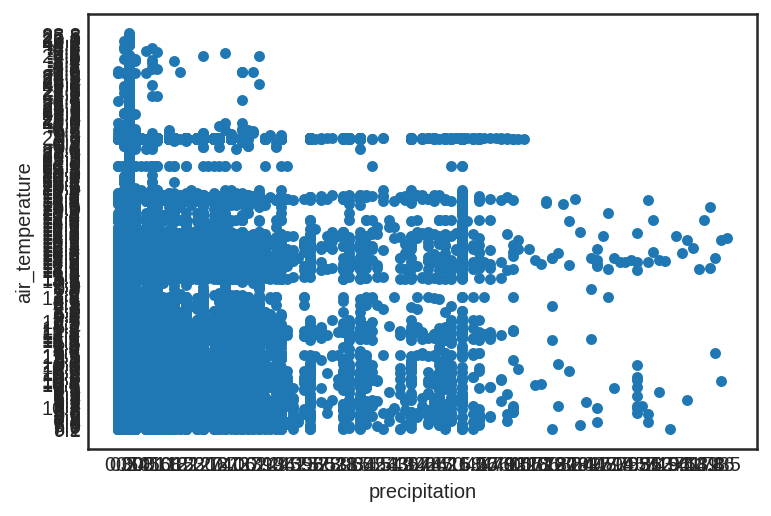

In [55]:
params = {'legend.fontsize': 'large',
'figure.figsize': (15, 9),
'axes.labelsize': 'x-large',
'axes.titlesize':'x-large',
'xtick.labelsize':'large',
'ytick.labelsize':'large'}
dff.plot(kind='scatter',x='precipitation',y='air_temperature')

In [58]:
#This will most likely give a type error because of dtype object, you can use the following code to convert object data to numerical type. This code should be called before the plot line above.
dff['precipitation'] = pd.to_numeric(dff.precipitation,errors='coerce')
dff['air_temperature'] = pd.to_numeric(dff.air_temperature,errors='coerce')

<AxesSubplot:xlabel='precipitation', ylabel='air_temperature'>

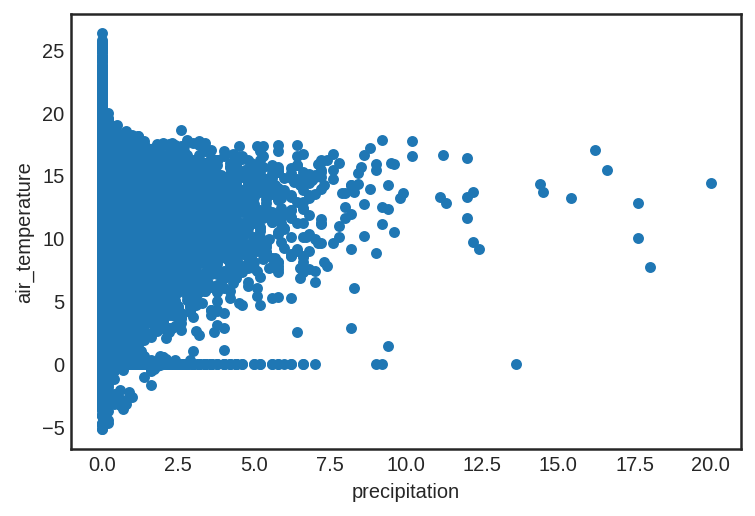

In [59]:
dff.plot(kind='scatter',x='precipitation',y='air_temperature')

In [71]:
df.show()

ConnectionRefusedError: [Errno 111] Connection refused

In [69]:
pff = pr.toPandas()

ConnectionRefusedError: [Errno 111] Connection refused

In [64]:
pff.plot(kind='hist',x='air temperature values',y='frequencies')

KeyError: 'air temperature values'